<a href="https://colab.research.google.com/github/CoreTheGreat/HBPU-Machine-Learning-Course/blob/main/ML_Chapter3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第三章：分类
湖北理工学院《机器学习》课程NoteBook

学生：吴兴平

笔记内容概述: 绘制混淆矩阵 Confusion Matrix


## Step 1: 数据准备

使用make_moons生成虚拟数据构建分类任务

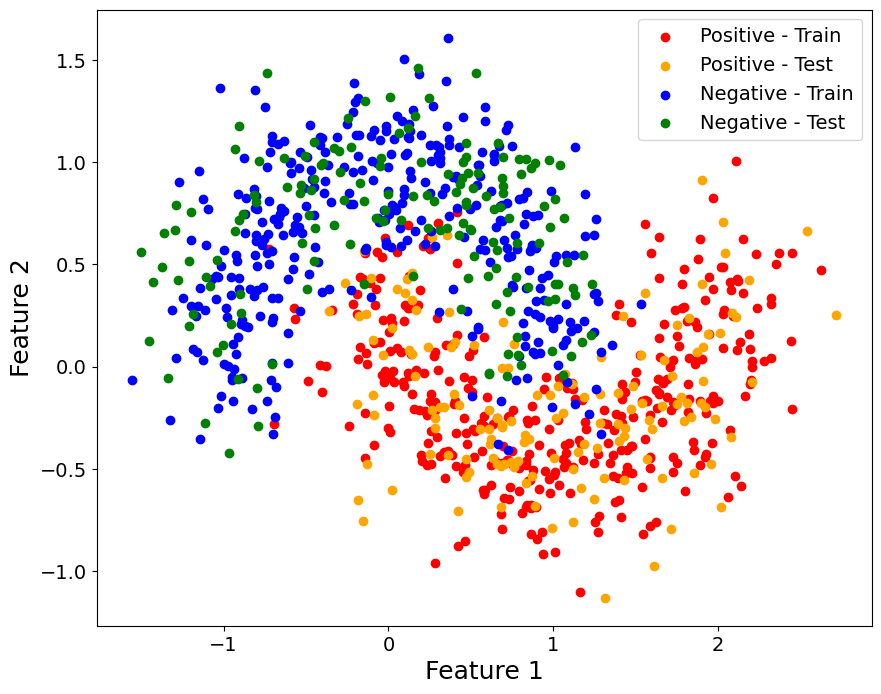

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

label_size = 18 # Label size
ticklabel_size = 14 # Tick label size

# Generate moon-shaped data
X, Y = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Split X and Y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Positive - Train')
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Positive - Test')
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Negative - Train')
ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='green', label='Negative - Test')
ax.set_xlabel('Feature 1', fontsize=label_size)
ax.set_ylabel('Feature 2', fontsize=label_size)

ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Set legend fontsize
plt.legend(prop={'size': 14})

plt.show()

## Step 2: 使用逻辑回归、SVM、决策树和随机森林模型进行分类

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Definition
mdl_lr = LogisticRegression() # Logistic Regression
mdl_svm = SVC() # Support Vector Machine
mdl_dt = DecisionTreeClassifier() # Decision Tree
mdl_rf = RandomForestClassifier(n_estimators=100) # Random Forests

# Model Training
mdl_lr.fit(X_train, y_train) # Logistic Regression
print('Logistic regression model trained successfully...')

mdl_svm.fit(X_train, y_train) # Support Vector machine
print('Support vector machine trained successfully...')

mdl_dt.fit(X_train, y_train) # Decision Tree
print('Decision tree trained successfully...')

mdl_rf.fit(X_train, y_train) # Random Forest
print('Random forests trained successfully...')

Logistic regression model trained successfully...
Support vector machine trained successfully...
Decision tree trained successfully...
Random forests trained successfully...


## Step 3: 混淆矩阵 Confusion Matrix

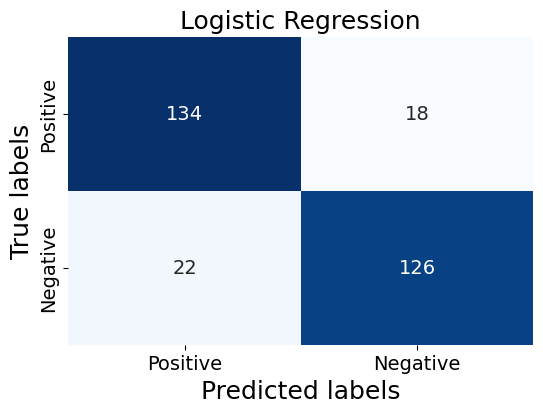

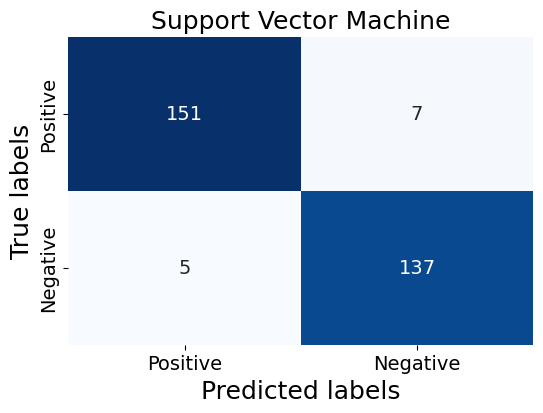

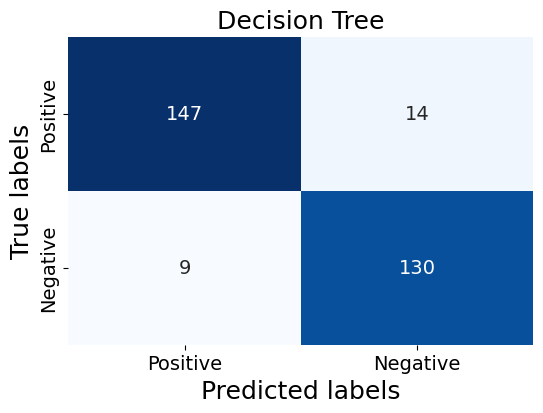

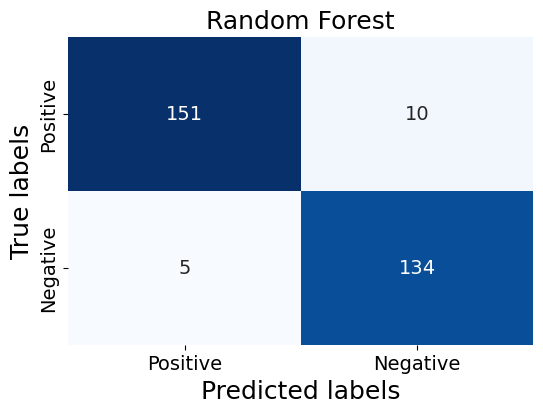

In [5]:
import seaborn as sns # To display confusion matrix
    
def confusion_matrix(y_pred, y):
    '''
    y_pred - predict classes
    y - actual classes
    '''
    # Get the number of classes
    n_classes = len(np.unique(y))
    
    # Initialize the confusion matrix with zeros
    cm = np.zeros((n_classes, n_classes))
    
    # Fill the confusion matrix
    for pred, actual in zip(y_pred, y):
        cm[pred][actual] += 1
    
    return cm

def cm_disp(cm, title='Confusion Matrix', save_fig=False):
    ''' 
    Display confusion matrix
    '''
    global label_size, ticklabel_size
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Use seaborn to create a heatmap without color bar
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax, annot_kws={'size': ticklabel_size}, cbar=False)
    
    # Set ticklabels
    ax.set_xticklabels(['Positive', 'Negative'])
    ax.set_yticklabels(['Positive', 'Negative'], rotation=90)
    
    # Set labels and title with custom font sizes
    ax.set_xlabel('Predicted labels', fontsize=label_size)
    ax.set_ylabel('True labels', fontsize=label_size)
    ax.set_title(title, fontsize=label_size)
    
    # Set tick label font size
    ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)
    
    if save_fig:
        plt.savefig(f'{title.replace(" ", "_")}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
# Get confusion matrix of all models
# Predictions for each model
y_pred_lr = mdl_lr.predict(X_test)
y_pred_svm = mdl_svm.predict(X_test)
y_pred_dt = mdl_dt.predict(X_test)
y_pred_rf = mdl_rf.predict(X_test)

# Confusion matrices for each model
cm_lr = confusion_matrix(y_pred_lr, y_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
cm_dt = confusion_matrix(y_pred_dt, y_test)
cm_rf = confusion_matrix(y_pred_rf, y_test)

# Display the confusion matrices
save_flag = False
cm_disp(cm_lr, title='Logistic Regression', save_fig=save_flag)
cm_disp(cm_svm, title='Support Vector Machine', save_fig=save_flag)
cm_disp(cm_dt, title='Decision Tree', save_fig=save_flag)
cm_disp(cm_rf, title='Random Forest', save_fig=save_flag)

### Step 4: 计算各模型的准确率 Accuracy

In [11]:
def getAccuracyFromCM(cm):
    # Calculate total number of samples
    total = np.sum(cm)
    
    # Calculate number of correct predictions (sum of diagonal elements)
    correct = np.trace(cm)
    
    # Calculate accuracy
    accuracy = correct / total
    
    return accuracy

# Accuracy of each model
acc_lr = getAccuracyFromCM(cm_lr)
acc_svm = getAccuracyFromCM(cm_svm)
acc_dt = getAccuracyFromCM(cm_dt)
acc_rf = getAccuracyFromCM(cm_rf)

# Print accuracies
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Support Vector Machine Accuracy: {acc_svm:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Logistic Regression Accuracy: 0.8667
Support Vector Machine Accuracy: 0.9600
Decision Tree Accuracy: 0.9233
Random Forest Accuracy: 0.9500
